# TODO scrape any car data from ss.com
* clean up prices as numerics
* group by make and model
* plot the data - pricing for sure
* if you do more advanced analysis that also could be used for the final project

* for those who want scraping part of final project
* scrape data from somewhere else - maybe Lithuanian ss.com or wikipedia?

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import unicodedata
import matplotlib.pyplot as plt

# Get URL and scrape the data, save to CSV file 

In [3]:
url = "https://www.ss.com/en/transport/cars/audi/"
url


'https://www.ss.com/en/transport/cars/audi/'

In [4]:
req = requests.get(url)  #extracting the html
req.status_code

200

In [5]:
soup = BeautifulSoup(req.text, 'lxml') 
soup.title

<title>SS.COM Cars - Audi, Prices - Advertisements</title>

In [6]:
# lets combine the above cells into a function which will always get us columns
def getColList(soup):
    column_list = ["description","url"] # we decided to that we need these two column names no matter the html
    headline = soup.find("tr", {"id":"head_line"}) #this will work as long as html has a table row with id head_line
    headtds = headline.find_all("td")
    headcolumns = [el.text for el in headtds[1:]]  # this will get all column names starting with 2nd in HTML
    column_list += headcolumns
    return column_list

In [7]:
column_names = getColList(soup)
column_names  # to be used later when creating our table

['description', 'url', 'Model', 'Year', 'Volume', 'Run', 'Price']

In [8]:
def getRowList(soup):
    trows = soup.find_all('tr')
    aprows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
    return aprows

In [9]:
# from row get dictionary with values 
def getRow(row, colist=column_names):
    row_tds = row.find_all('td')
    rowDict = {}
    if len(row_tds) < 3: # a little sanity check
        print("Hmm bad row")
        return rowDict
    
    rowDict[colist[0]] = row_tds[2].text # so the big assumption is that we always get description in 3rd column
    rowDict[colist[1]] = "https://ss.com" + row_tds[1].find('a').get('href')
    for td,key in zip(row_tds[3:],colist[2:]): 
        rowDict[key] = td.text
    return rowDict

In [10]:
def getRows(rowlist,colist=column_names):
    return [getRow(row, colist=colist) for row in rowlist]

In [11]:
def getDFfromURL(url):
    # print("getting data from", url)
    req = requests.get(url)
    if req.status_code != 200:
        print("Request Fail with", req.status_code)
        return None # maybe return empty dataframe here
    soup = BeautifulSoup(req.text, 'lxml')
    column_names = getColList(soup)
    rowlist = getRowList(soup)
    rows = getRows(rowlist,colist=column_names)
    return pd.DataFrame(rows)
    

In [12]:
audi_cars = "https://www.ss.com/en/transport/cars/audi/"
idf = getDFfromURL(audi_cars)
idf.head()

,description,url,Model,Year,Volume,Run,Price
0,Pārdod Audi A6 Allroad 2.7d\r\n\r\n-Quattro\r\...,https://ss.com/msg/en/transport/cars/audi/allr...,Allroad,2008,2.7D,358 thd.,"5,900 €"
1,"Audi A6 S-Tronic 214Zs Dsg, Cena ar Pvn;\r\n\r...",https://ss.com/msg/en/transport/cars/audi/a6/h...,A6,2017,3.0D,163 thd.,"26,900 €"
2,"3.0D, S-Line pakete, pneumo piekare, 7 sēdviet...",https://ss.com/msg/en/transport/cars/audi/q7/o...,Q7,2007,3.0D,399 thd.,"7,500 €"
3,"Pilna 3xS-line (piekare, interjers, eksterjers...",https://ss.com/msg/en/transport/cars/audi/a6/e...,A6,2007,3.0D,292 thd.,"5,800 €"
4,"Pārdodu Audi A6 facelift, 2009 gads, 2, 7 dīze...",https://ss.com/msg/en/transport/cars/audi/a6/f...,A6,2009,2.7D,335 thd.,"6,800 €"


# Read CSV file, clean up prices, sort data by model and year

In [13]:
idf.to_csv("audi_sell_list.csv")

In [14]:
audi_df = pd.read_csv("audi_sell_list.csv")
audi_df.head()

,Unnamed: 0,description,url,Model,Year,Volume,Run,Price
0,0,Pārdod Audi A6 Allroad 2.7d\r\n\r\n-Quattro\r\...,https://ss.com/msg/en/transport/cars/audi/allr...,Allroad,2008,2.7D,358 thd.,"5,900 €"
1,1,"Audi A6 S-Tronic 214Zs Dsg, Cena ar Pvn;\r\n\r...",https://ss.com/msg/en/transport/cars/audi/a6/h...,A6,2017,3.0D,163 thd.,"26,900 €"
2,2,"3.0D, S-Line pakete, pneumo piekare, 7 sēdviet...",https://ss.com/msg/en/transport/cars/audi/q7/o...,Q7,2007,3.0D,399 thd.,"7,500 €"
3,3,"Pilna 3xS-line (piekare, interjers, eksterjers...",https://ss.com/msg/en/transport/cars/audi/a6/e...,A6,2007,3.0D,292 thd.,"5,800 €"
4,4,"Pārdodu Audi A6 facelift, 2009 gads, 2, 7 dīze...",https://ss.com/msg/en/transport/cars/audi/a6/f...,A6,2009,2.7D,335 thd.,"6,800 €"


In [15]:
audi_df['Price'] = audi_df['Price'].str.replace(unicodedata.lookup('EURO SIGN'), '')
audi_df['Price'] = audi_df['Price'].str.replace(",", '')

audi_df.head()



,Unnamed: 0,description,url,Model,Year,Volume,Run,Price
0,0,Pārdod Audi A6 Allroad 2.7d\r\n\r\n-Quattro\r\...,https://ss.com/msg/en/transport/cars/audi/allr...,Allroad,2008,2.7D,358 thd.,5900
1,1,"Audi A6 S-Tronic 214Zs Dsg, Cena ar Pvn;\r\n\r...",https://ss.com/msg/en/transport/cars/audi/a6/h...,A6,2017,3.0D,163 thd.,26900
2,2,"3.0D, S-Line pakete, pneumo piekare, 7 sēdviet...",https://ss.com/msg/en/transport/cars/audi/q7/o...,Q7,2007,3.0D,399 thd.,7500
3,3,"Pilna 3xS-line (piekare, interjers, eksterjers...",https://ss.com/msg/en/transport/cars/audi/a6/e...,A6,2007,3.0D,292 thd.,5800
4,4,"Pārdodu Audi A6 facelift, 2009 gads, 2, 7 dīze...",https://ss.com/msg/en/transport/cars/audi/a6/f...,A6,2009,2.7D,335 thd.,6800


In [16]:
audi_df['Price'].describe()  

count         30
unique        29
top       4990  
freq           2
Name: Price, dtype: object

In [17]:
audi_df['Price'] = pd.to_numeric(audi_df['Price'], errors='coerce')  #convert dtyper: object to dtype:float64
audi_df['Price'].describe()

count       28.000000
mean      8861.071429
std       6895.174018
min       1400.000000
25%       3322.500000
50%       6850.000000
75%      13192.500000
max      26900.000000
Name: Price, dtype: float64

In [27]:
audi_sorted_by_price = audi_df.sort_values(by="Price",ascending=True)
audi_sorted_by_price.tail(15)

,Unnamed: 0,description,url,Model,Year,Volume,Run,Price
1,1,"Audi A6 S-Tronic 214Zs Dsg, Cena ar Pvn;\r\n\r...",https://ss.com/msg/en/transport/cars/audi/a6/h...,A6,2017,3.0D,163 thd.,26900.0
4,4,"Pārdodu Audi A6 facelift, 2009 gads, 2, 7 dīze...",https://ss.com/msg/en/transport/cars/audi/a6/f...,A6,2009,2.7D,335 thd.,6800.0
3,3,"Pilna 3xS-line (piekare, interjers, eksterjers...",https://ss.com/msg/en/transport/cars/audi/a6/e...,A6,2007,3.0D,292 thd.,5800.0
18,18,"Pārdodu Audi A6 C6 Facelift, s-line, 3.0 tdi, ...",https://ss.com/msg/en/transport/cars/audi/a6/g...,A6,2009,3.0D,317 thd.,7950.0
23,23,"S- Line, 3.0tdi, Quattro, melns s-line recaro ...",https://ss.com/msg/en/transport/cars/audi/a6/e...,A6,2008,3.0D,-,4990.0
22,22,"2.5tdi, 85kw, mehānika, 5-ātrumi, ādas recaro ...",https://ss.com/msg/en/transport/cars/audi/a6/b...,A6,1997,2.5D,-,NaN
21,21,"S- Line, 3.0tdi, Quattro, melns s-line recaro ...",https://ss.com/msg/en/transport/cars/audi/a6/a...,A6,2006,3.0D,-,5790.0
20,20,"3.0tdi, Quattro, melns recaro ādas salons, sēd...",https://ss.com/msg/en/transport/cars/audi/allr...,Allroad,2006,3.0D,-,4990.0
19,19,"Allroad, Quattro, 2.5Tdi, melns ādas salons, e...",https://ss.com/msg/en/transport/cars/audi/allr...,Allroad,2004,2.5D,-,2490.0
28,28,"Pārdodu Audi A6 Allroad 2, 7 Tdi dīzelis. 4X4,...",https://ss.com/msg/en/transport/cars/audi/allr...,Allroad,2007,2.7D,250 thd.,6900.0


In [25]:
audi_sorted_by_year = audi_df.sort_values(['Year'], ascending=[True])
audi_sorted_by_year.head()

,Unnamed: 0,description,url,Model,Year,Volume,Run,Price
22,22,"2.5tdi, 85kw, mehānika, 5-ātrumi, ādas recaro ...",https://ss.com/msg/en/transport/cars/audi/a6/b...,A6,1997,2.5D,-,NaN
29,29,"Labdien, tiek tirgots labs, uzticams auto. \r\...",https://ss.com/msg/en/transport/cars/audi/a4/e...,A4,2000,1.8,251 thd.,1400.0
12,12,"Pārdodu/продаю Audi a4b6 1.9tdi, 2001g, \r\nFi...",https://ss.com/msg/en/transport/cars/audi/a4/h...,A4,2001,1.9D,294 thd.,2400.0
13,13,"Audi A2 1.4tdi 55kw no Vācijas, Latvijā nav ek...",https://ss.com/msg/en/transport/cars/audi/a2/c...,A2,2001,1.4D,244 thd.,3500.0
27,27,Audi A6 Avant 2.5 Tdi 132kw. Jauna TA\r\n\r\n-...,https://ss.com/msg/en/transport/cars/audi/a6/d...,A6,2002,2.5D,-,1650.0


In [20]:
audi_df.groupby(['Model']).agg({'Price':['min','max','count']})  #A3 model max price should be 18595eur,but it's not here why?

Price               
             min      max count
Model                          
A2        3500.0   3500.0     1
A3        2290.0  17550.0     4
A4        1400.0  24150.0     6
A5       13800.0  13800.0     1
A6        1650.0  26900.0     9
Allroad   2490.0   6900.0     4
C220         NaN      NaN     0
Q3       14900.0  14900.0     1
Q7        7500.0   9500.0     2

In [21]:
audi_df.groupby(['Year']).describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1997,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,1.0,1400.000000,NaN,1400.0,1400.0,1400.0,1400.0,1400.0
2001,2.0,2950.000000,777.817459,2400.0,2675.0,2950.0,3225.0,3500.0
2002,1.0,1650.000000,NaN,1650.0,1650.0,1650.0,1650.0,1650.0
2003,1.0,1990.000000,NaN,1990.0,1990.0,1990.0,1990.0,1990.0
2004,2.0,2390.000000,141.421356,2290.0,2340.0,2390.0,2440.0,2490.0
2005,1.0,2790.000000,NaN,2790.0,2790.0,2790.0,2790.0,2790.0
2006,2.0,5390.000000,565.685425,4990.0,5190.0,5390.0,5590.0,5790.0
2007,3.0,6733.333333,862.167810,5800.0,6350.0,6900.0,7200.0,7500.0


# Plot the data

Text(0.5, 1.0, 'Audi price plot by year')

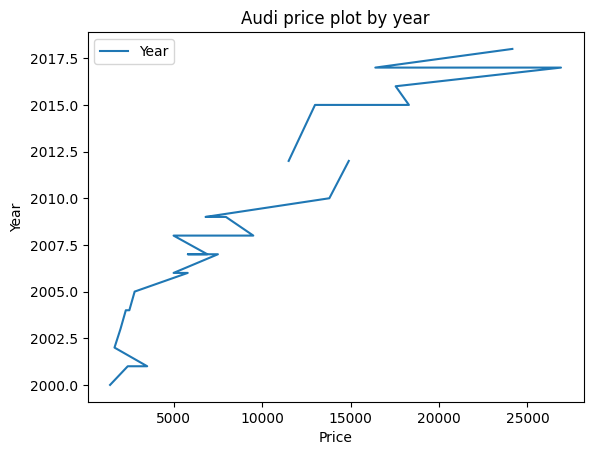

In [26]:
audi_price_plot = pd.DataFrame(audi_sorted_by_year,columns=['Year','Price'])
audi_price_plot.plot(x ='Year', y='Price', kind = 'line')
plt.legend()
plt.xlabel('$Year$')
plt.ylabel('$Price$')
plt.title('Audi price plot by year')




In [ ]:
audi_price_plot = pd.DataFrame(audi_sorted_by_price,columns=['Year','Price'])
audi_price_plot.plot(x ='Model', y='Price', kind = 'bar')
plt.legend()
plt.xlabel('$Year$')
plt.ylabel('$Price$')
plt.title('Audi model plot by price')



In [ ]:
audi_df['Volume'] = audi_df['Volume'].str.replace('D', '')
audi_df.head()


In [ ]:
audi_pivot_table = audi_df.pivot_table(index='Year', columns='Volume', values='Price', aggfunc=np.median)
audi_pivot_table